In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # importing neccesary ,libraries

In [2]:
Data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv") #Loading the data

In [3]:
Data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
Data.shape #Checking the rows and columns

(32560, 15)

In [5]:
Data.info() #Checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
Data['Workclass'].unique() #Checking the object data type

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

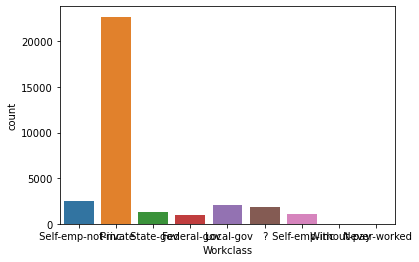

In [7]:
sns.countplot(Data['Workclass'])

In [8]:
Data['Education'].unique() #Checking the object data type

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

<AxesSubplot:xlabel='Education', ylabel='count'>

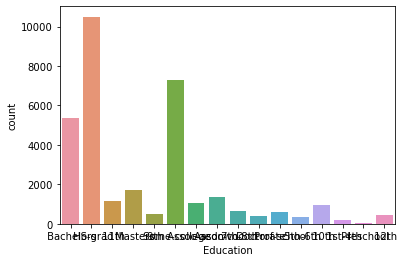

In [9]:
sns.countplot(Data['Education'])

In [10]:
Data['Marital_status'].unique() #Checking the object data type

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

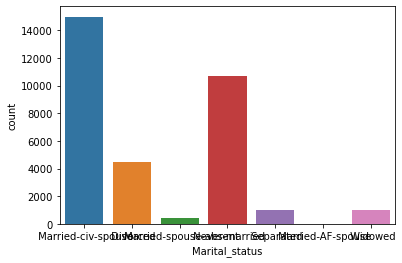

In [11]:
sns.countplot(Data['Marital_status'])

In [12]:
Data['Occupation'].unique() #Checking the object data type

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

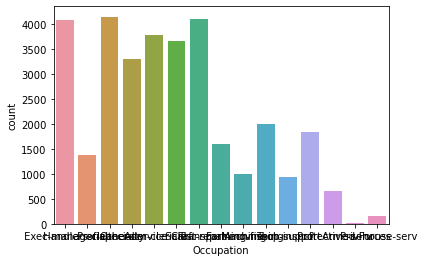

In [13]:
sns.countplot(Data['Occupation'])

In [14]:
Data['Relationship'].unique() #Checking the object data type

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

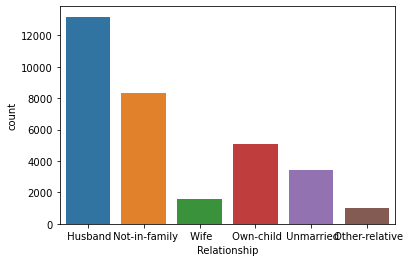

In [15]:
sns.countplot(Data['Relationship'])

In [16]:
Data['Race'].unique() #Checking the object data type

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

<AxesSubplot:xlabel='Race', ylabel='count'>

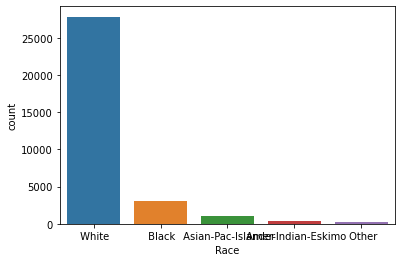

In [17]:
sns.countplot(Data['Race'])

In [18]:
Data['Sex'].unique() #Checking the object data type

array([' Male', ' Female'], dtype=object)

<AxesSubplot:xlabel='Sex', ylabel='count'>

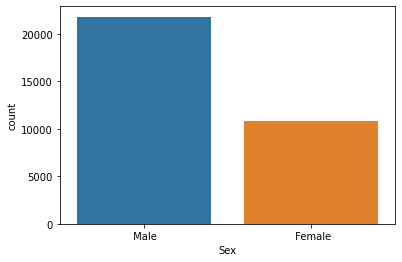

In [19]:
sns.countplot(Data['Sex'])

In [20]:
Data['Sex'].value_counts() #Checking if the numbers are equal

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [21]:
Data['Native_country'].unique() #Checking the object data type

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

<AxesSubplot:xlabel='Native_country', ylabel='count'>

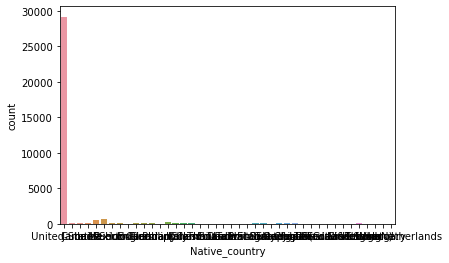

In [22]:
sns.countplot(Data['Native_country'])

In [23]:
Data['Income'].unique() #Checking the object data type

array([' <=50K', ' >50K'], dtype=object)

<AxesSubplot:xlabel='Income', ylabel='count'>

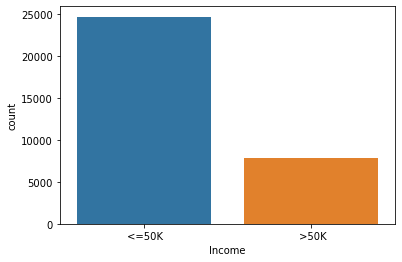

In [24]:
sns.countplot(Data['Income'])

In [25]:
Data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [26]:
#From the above observations, below things can be concluded:
# 1. Majority of the workclass is private sector
#2. Majority of education qualification is HS-grad and Some college
#3.Majoriy of the marital status is married and unmarried
#4. Husband is common for majority of relationship
#5.Majority of the race is white and the sex being male
#6.Most of the people have their native country as united states
#7.Outcome column/Income is unbalanced with majority percentage people earning less than 50K

In [27]:
Data["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [28]:
#Workclass has 1836 ? values which means no data and needs to be dropped

In [29]:
No_Value=np.where(Data['Workclass']==' ?')
No_Value

(array([   26,    60,    68, ..., 32538, 32540, 32541], dtype=int64),)

In [30]:
#Getting the index values which has ? as its value

In [31]:
Data.drop(No_Value[0],axis=0,inplace=True)

In [32]:
Data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [33]:
Data["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [34]:
#Checking the data after dropping the values

In [35]:
Data.isnull().sum() #Checking the null values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [36]:
# No Null values

In [37]:
from sklearn.preprocessing import OrdinalEncoder #Encoding the object data 

In [38]:
OE= OrdinalEncoder()
Encode= OE.fit_transform(Data[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']])
Encode

array([[ 5.,  9.,  2., ...,  1., 39.,  0.],
       [ 3., 11.,  0., ...,  1., 39.,  0.],
       [ 3.,  1.,  2., ...,  1., 39.,  0.],
       ...,
       [ 3., 11.,  6., ...,  0., 39.,  0.],
       [ 3., 11.,  4., ...,  1., 39.,  0.],
       [ 4., 11.,  2., ...,  0., 39.,  1.]])

In [39]:
Data[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']]=Encode

In [40]:
Data.info() #After encoding

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30724 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             30724 non-null  int64  
 1   Workclass       30724 non-null  float64
 2   Fnlwgt          30724 non-null  int64  
 3   Education       30724 non-null  float64
 4   Education_num   30724 non-null  int64  
 5   Marital_status  30724 non-null  float64
 6   Occupation      30724 non-null  float64
 7   Relationship    30724 non-null  float64
 8   Race            30724 non-null  float64
 9   Sex             30724 non-null  float64
 10  Capital_gain    30724 non-null  int64  
 11  Capital_loss    30724 non-null  int64  
 12  Hours_per_week  30724 non-null  int64  
 13  Native_country  30724 non-null  float64
 14  Income          30724 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 3.8 MB


In [41]:
Data['Income'].value_counts()

0.0    23074
1.0     7650
Name: Income, dtype: int64

In [42]:
# Target data is imbalanced, hence needs to be resampled

In [43]:
from sklearn.utils import resample

In [44]:
Less_Income=Data[Data.Income==0.0]
More_Income=Data[Data.Income==1.0]

In [45]:
Income_upsamples=resample(More_Income,replace=True,n_samples=len(Less_Income),random_state=27)

In [46]:
upsampled=pd.concat([Less_Income,Income_upsamples])

In [47]:
Data=upsampled

In [48]:
Data['Income'].value_counts()

0.0    23074
1.0    23074
Name: Income, dtype: int64

In [49]:
Data.describe() #Checking the statistics

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,46148.000000,46148.000000,4.614800e+04,46148.000000,46148.000000,46148.000000,46148.000000,46148.000000,46148.000000,46148.000000,46148.000000,46148.000000,46148.000000,46148.000000,46148.000000
mean,40.318107,3.088151,1.892281e+05,10.499155,10.631100,2.415121,7.085551,1.175826,3.709998,0.737908,2000.218753,127.634935,42.518809,36.763717,0.500000
std,12.492356,1.185627,1.042864e+05,3.523628,2.598225,1.339879,4.013273,1.617759,0.804832,0.439777,10220.905804,487.234176,11.754188,7.839152,0.500005
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,31.000000,3.000000,1.179128e+05,9.000000,9.000000,2.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,40.000000,3.000000,1.779005e+05,11.000000,10.000000,2.000000,7.000000,0.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.500000
75%,49.000000,3.000000,2.360210e+05,12.000000,13.000000,4.000000,10.000000,2.000000,4.000000,1.000000,0.000000,0.000000,50.000000,39.000000,1.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [50]:
#Huge difference in mean and standard deviation in all columns
# Difference in maximum and minimum values

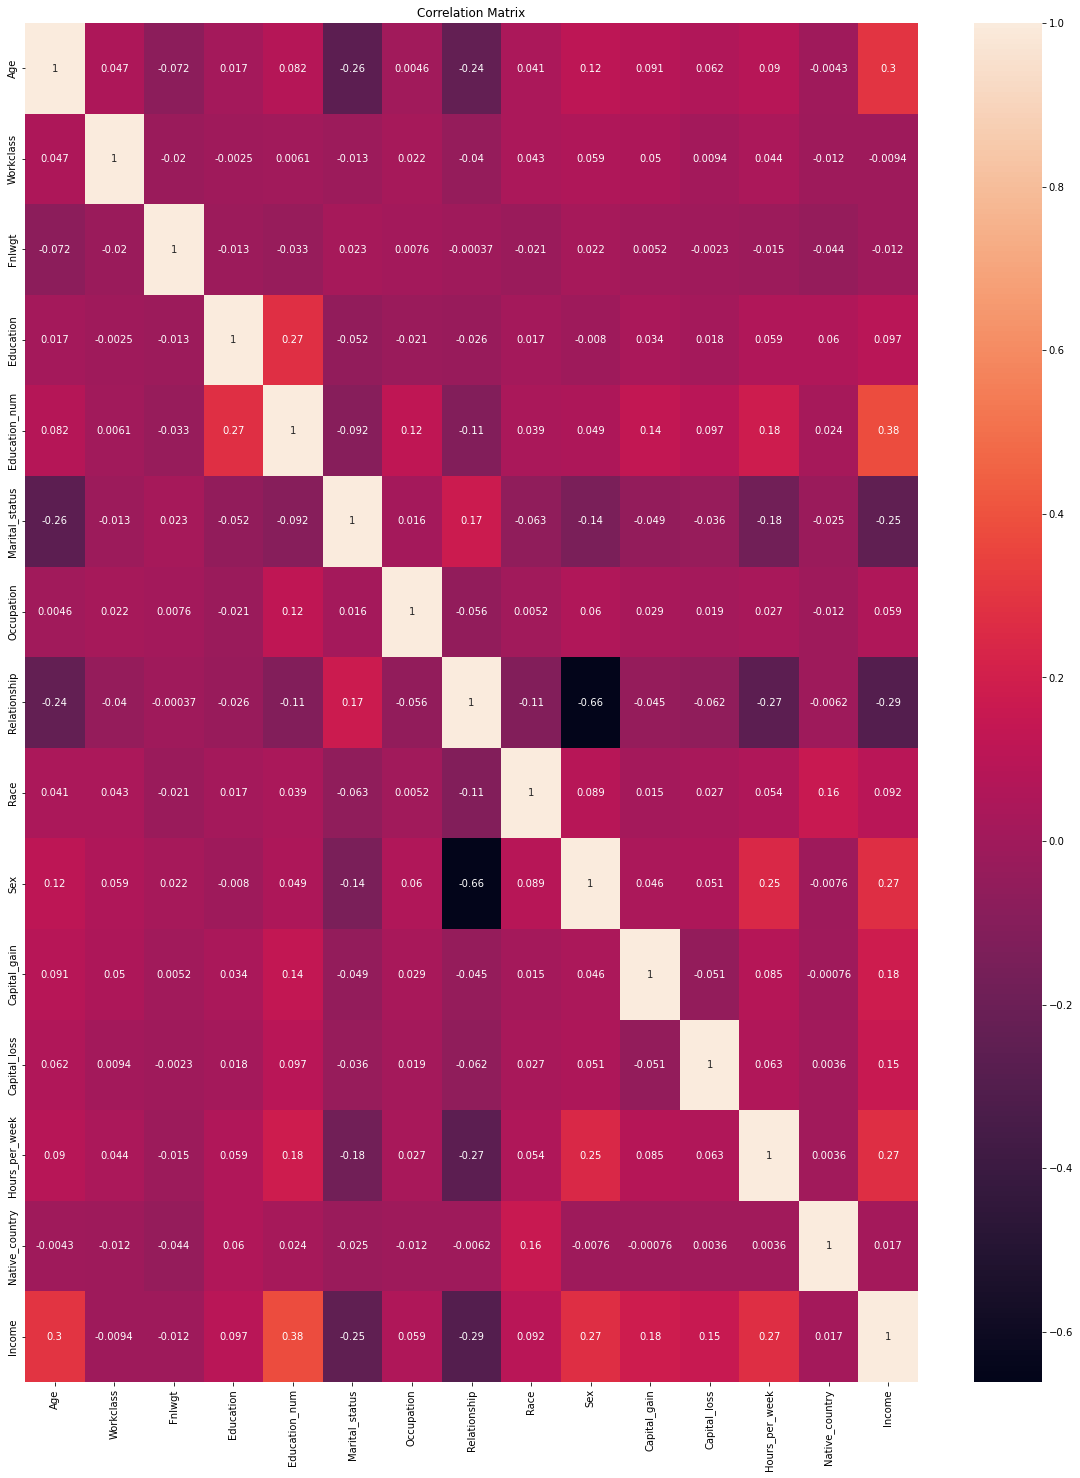

In [51]:
corr_mat=Data.corr()
plt.figure(figsize=[20,25])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation

In [52]:
vif_data = pd.DataFrame()
vif_data["feature"] = Data.columns
vif_data["VIF"] = [variance_inflation_factor(Data.values, i)
                          for i in range(len(Data.columns))]

vif_data

,feature,VIF
0,Age,11.279836
1,Workclass,7.587062
2,Fnlwgt,4.111041
3,Education,10.440036
4,Education_num,20.889669
5,Marital_status,4.359496
6,Occupation,4.145799
7,Relationship,2.544763
8,Race,20.299541
9,Sex,6.486453


In [53]:
#Dropping off the columns which has least corelation with target variable(Income) and more corelation with feature variable
#Fnlwgt- No relation with target variable (-0.012) Relationship (-0.29)
#Native_country- Least relation with Income(0.017) more with feature variable (20.29)
#Educational number- More corelaionwith feature variable (20.889)


In [54]:
Data.drop(['Fnlwgt','Native_country','Education_num','Relationship'],axis=1,inplace=True)

In [55]:
Data

,Age,Workclass,Education,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,5.0,9.0,2.0,4.0,4.0,1.0,0,0,13,0.0
1,38,3.0,11.0,0.0,6.0,4.0,1.0,0,0,40,0.0
2,53,3.0,1.0,2.0,6.0,2.0,1.0,0,0,40,0.0
3,28,3.0,9.0,2.0,10.0,2.0,0.0,0,0,40,0.0
4,37,3.0,12.0,2.0,4.0,4.0,0.0,0,0,40,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2366,34,4.0,12.0,5.0,10.0,4.0,0.0,4787,0,40,1.0
26815,54,3.0,15.0,2.0,12.0,4.0,1.0,7298,0,50,1.0
24936,44,3.0,9.0,2.0,7.0,4.0,1.0,0,0,40,1.0
31952,37,3.0,9.0,2.0,4.0,4.0,0.0,0,1848,40,1.0


In [56]:
Data.shape

(46148, 11)

In [57]:
vif_data = pd.DataFrame()
vif_data["feature"] = Data.columns
vif_data["VIF"] = [variance_inflation_factor(Data.values, i)
                          for i in range(len(Data.columns))]

vif_data

,feature,VIF
0,Age,10.769409
1,Workclass,7.401257
2,Education,8.770080
3,Marital_status,4.006013
4,Occupation,3.996575
5,Race,16.468430
6,Sex,4.312285
7,Capital_gain,1.085008
8,Capital_loss,1.102481
9,Hours_per_week,13.462383


In [58]:
#Dropping off race as it has high covariance and less dependence on target variable

In [59]:
Data.drop('Race',axis=1,inplace=True)

In [60]:
vif_data = pd.DataFrame()
vif_data["feature"] = Data.columns
vif_data["VIF"] = [variance_inflation_factor(Data.values, i)
                          for i in range(len(Data.columns))]

vif_data

,feature,VIF
0,Age,9.868443
1,Workclass,7.097334
2,Education,8.257282
3,Marital_status,3.788913
4,Occupation,3.941442
5,Sex,4.261283
6,Capital_gain,1.083587
7,Capital_loss,1.102481
8,Hours_per_week,12.399022
9,Income,2.608527


In [61]:
X=Data.drop('Income',axis=1) #Feature variable
Y=Data['Income'] #Target variable

In [62]:
X.shape

(46148, 9)

In [63]:
Y.shape

(46148,)

In [64]:
#Comparing feature and target variable

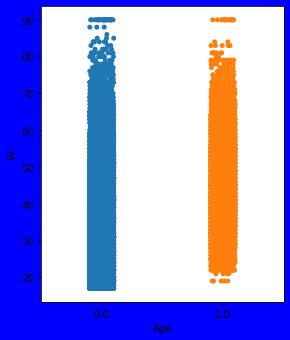

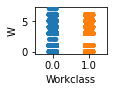

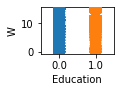

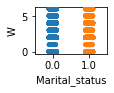

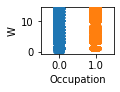

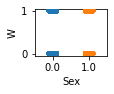

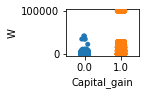

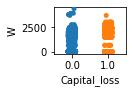

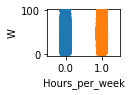

In [65]:
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber=1
for column in X.columns:
 if plotnumber<=9:
    ax=plt.subplot(4,4,plotnumber)
    sns.stripplot(Y,X[column])
    plt.xlabel(column)
    plt.ylabel('W')
 plotnumber=plotnumber+1
 plt.show()

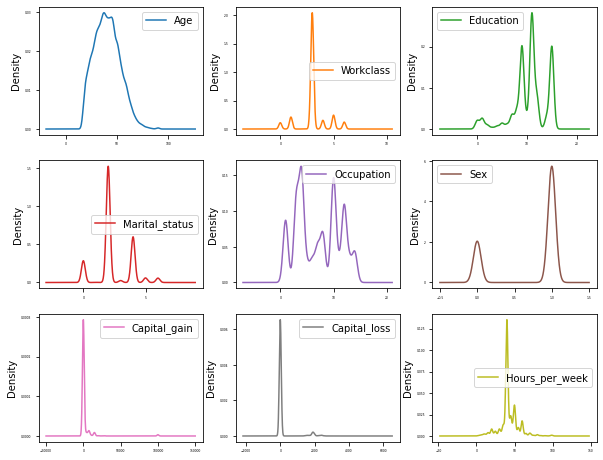

In [66]:
X.plot(kind='kde',subplots=True,layout=(3,3),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() #Checking skewness

In [67]:
X.skew().sort_values(ascending=False)

Capital_gain      8.545072
Capital_loss      3.665486
Hours_per_week    0.391770
Age               0.357336
Marital_status    0.315783
Occupation        0.084348
Workclass        -0.065020
Education        -0.942162
Sex              -1.081998
dtype: float64

In [68]:
from sklearn.preprocessing import power_transform

In [69]:
New_X=power_transform(X)

In [70]:
pd.DataFrame(New_X,columns=X.columns).skew().sort_values(ascending=False) # transforming the data to reduce skewness

Capital_loss      3.497389
Capital_gain      2.256380
Hours_per_week    0.251982
Workclass         0.151796
Marital_status   -0.001675
Age              -0.026082
Occupation       -0.153168
Education        -0.206235
Sex              -1.081998
dtype: float64

In [71]:
X=pd.DataFrame(New_X,columns=X.columns)

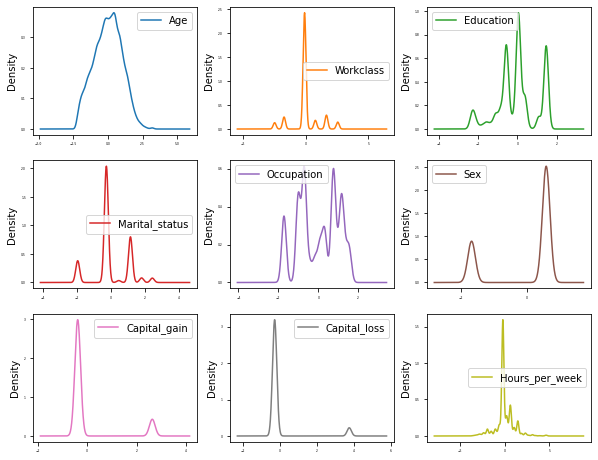

In [72]:
X.plot(kind='kde',subplots=True,layout=(3,3),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() #Checking skewness after transformation

In [87]:
X.shape

(46148, 9)

In [88]:
Y.shape

(46148,)

In [89]:
Scalar=StandardScaler() #scaling the data

In [91]:
X_Scaled=Scalar.fit_transform(X)
X_Scaled

array([[ 0.80724803,  1.64955283, -0.55980808, ..., -0.3794045 ,
        -0.26574404, -2.57297767],
       [-0.10423402, -0.09446117,  0.05108134, ..., -0.3794045 ,
        -0.26574404, -0.20501856],
       [ 1.01645717, -0.09446117, -2.23030984, ..., -0.3794045 ,
        -0.26574404, -0.20501856],
       ...,
       [ 0.36793719, -0.09446117, -0.55980808, ..., -0.3794045 ,
        -0.26574404, -0.20501856],
       [-0.18665127, -0.09446117, -0.55980808, ..., -0.3794045 ,
         3.76301966, -0.20501856],
       [ 1.60894508, -1.72899825,  0.38077867, ..., -0.3794045 ,
        -0.26574404, -0.20501856]])

# Logistic Regression

In [92]:
LR=LogisticRegression()

In [94]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    LR.fit(X_train,y_train)
    pred_test=LR.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.7206933911159263
/n
At random state 1 the testing accurancy is:- 0.7252437703141928
/n
At random state 2 the testing accurancy is:- 0.7180931744312026
/n
At random state 3 the testing accurancy is:- 0.7209100758396533
/n
At random state 4 the testing accurancy is:- 0.72795232936078
/n
At random state 5 the testing accurancy is:- 0.7263271939328277
/n
At random state 6 the testing accurancy is:- 0.7265438786565547
/n
At random state 7 the testing accurancy is:- 0.7229685807150595
/n
At random state 8 the testing accurancy is:- 0.7266522210184182
/n
At random state 9 the testing accurancy is:- 0.7143011917659805
/n
At random state 10 the testing accurancy is:- 0.7310942578548212
/n
At random state 11 the testing accurancy is:- 0.71397616468039
/n
At random state 12 the testing accurancy is:- 0.723943661971831
/n
At random state 13 the testing accurancy is:- 0.7254604550379198
/n
At random state 14 the testing accurancy is:- 0.731744312026002

In [145]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=48)
LR.fit(X_train,y_train)
pred_test=LR.predict(X_test)

In [146]:
LR_Accuracy=accuracy_score(y_test,pred_test)*100
LR_Accuracy

72.99024918743228

# KNearest Neighbour

In [95]:
knn=KNeighborsClassifier()

In [96]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    knn.fit(X_train,y_train)
    pred_test=knn.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.8264355362946912
/n
At random state 1 the testing accurancy is:- 0.8289274106175515
/n
At random state 2 the testing accurancy is:- 0.8265438786565548
/n
At random state 3 the testing accurancy is:- 0.828385698808234
/n
At random state 4 the testing accurancy is:- 0.8361863488624052
/n
At random state 5 the testing accurancy is:- 0.8253521126760563
/n
At random state 6 the testing accurancy is:- 0.8252437703141928
/n
At random state 7 the testing accurancy is:- 0.8296858071505959
/n
At random state 8 the testing accurancy is:- 0.8273022751895991
/n
At random state 9 the testing accurancy is:- 0.8340195016251354
/n
At random state 10 the testing accurancy is:- 0.8287107258938244
/n
At random state 11 the testing accurancy is:- 0.8167930660888407
/n
At random state 12 the testing accurancy is:- 0.828602383531961
/n
At random state 13 the testing accurancy is:- 0.828385698808234
/n
At random state 14 the testing accurancy is:- 0.8301191765980

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=48)
knn.fit(X_train,y_train)
pred_test=knn.predict(X_test)

In [148]:
KNN_Accuracy=accuracy_score(y_test,pred_test)*100
KNN_Accuracy

83.261105092091

# Random Forest Classifier

In [98]:
rfc=RandomForestClassifier()

In [100]:
for i in range (0,50):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    rfc.fit(X_train,y_train)
    pred_test=rfc.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.9114842903575298
/n
At random state 1 the testing accurancy is:- 0.9094257854821235
/n
At random state 2 the testing accurancy is:- 0.9102925243770315
/n
At random state 3 the testing accurancy is:- 0.9071505958829903
/n
At random state 4 the testing accurancy is:- 0.9100758396533044
/n
At random state 5 the testing accurancy is:- 0.905742145178765
/n
At random state 6 the testing accurancy is:- 0.9086673889490791
/n
At random state 7 the testing accurancy is:- 0.90465872156013
/n
At random state 8 the testing accurancy is:- 0.9047670639219935
/n
At random state 9 the testing accurancy is:- 0.9070422535211268
/n
At random state 10 the testing accurancy is:- 0.9066088840736728
/n
At random state 11 the testing accurancy is:- 0.9007583965330445
/n
At random state 12 the testing accurancy is:- 0.9106175514626219
/n
At random state 13 the testing accurancy is:- 0.9072589382448537
/n
At random state 14 the testing accurancy is:- 0.9100758396533

In [149]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=48)
rfc.fit(X_train,y_train)
pred_test=rfc.predict(X_test)

In [150]:
rfc_accuracy=accuracy_score(y_test,pred_test)*100
rfc_accuracy

91.0184182015168

# GradientBoosting

In [102]:
GB=GradientBoostingClassifier()

In [103]:
for i in range (0,50):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    GB.fit(X_train,y_train)
    pred_test=GB.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.828385698808234
/n
At random state 1 the testing accurancy is:- 0.8318526543878657
/n
At random state 2 the testing accurancy is:- 0.8349945828819069
/n
At random state 3 the testing accurancy is:- 0.8255687973997833
/n
At random state 4 the testing accurancy is:- 0.8384615384615385
/n
At random state 5 the testing accurancy is:- 0.8358613217768147
/n
At random state 6 the testing accurancy is:- 0.8319609967497291
/n
At random state 7 the testing accurancy is:- 0.8279523293607801
/n
At random state 8 the testing accurancy is:- 0.8305525460455038
/n
At random state 9 the testing accurancy is:- 0.8310942578548213
/n
At random state 10 the testing accurancy is:- 0.8327193932827736
/n
At random state 11 the testing accurancy is:- 0.8228602383531961
/n
At random state 12 the testing accurancy is:- 0.8319609967497291
/n
At random state 13 the testing accurancy is:- 0.8367280606717227
/n
At random state 14 the testing accurancy is:- 0.83618634886

# Cross Validation for LR

In [104]:
for i in range(2,6):
    LR_Val=cross_val_score(LR,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",LR_Val.mean())

The cross validation score for 2 is 0.7254918956401144
The cross validation score for 3 is 0.7256003466850389
The cross validation score for 4 is 0.7253402097599029
The cross validation score for 5 is 0.7256220212160382


# Cross Validation for KNN

In [105]:
for i in range(2,6):
    KNN_Val=cross_val_score(knn,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",KNN_Val.mean())

The cross validation score for 2 is 0.8097642368033284
The cross validation score for 3 is 0.818583785237553
The cross validation score for 4 is 0.8237193377827858
The cross validation score for 5 is 0.826601525855836


# Cross Validation for RFC

In [106]:
for i in range(2,6):
    RFC_Val=cross_val_score(rfc,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",RFC_Val.mean())

The cross validation score for 2 is 0.8848487475080177
The cross validation score for 3 is 0.8999089400117953
The cross validation score for 4 is 0.9043078789980064
The cross validation score for 5 is 0.908750080854699


# Cross Validation for GB

In [107]:
for i in range(2,6):
    GB_Val=cross_val_score(GB,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",GB_Val.mean())

The cross validation score for 2 is 0.8338389529340383
The cross validation score for 3 is 0.8343373863383207
The cross validation score for 4 is 0.8337739446996619
The cross validation score for 5 is 0.8341422951136057


### Looking at the data, the highest accuracy score with the minimum difference between cross validation percentage, goes for Random Forest Classifier. Therefore Random Forest Classifier is chosen for this data set

# Hypertuning Parameter

In [109]:
RFC=RandomForestClassifier()

In [110]:
parameters={'max_depth':(list(range(10,15))),'min_samples_split':(list(range(4,5))),'min_samples_leaf':(list(range(2,3)))}
clf=GridSearchCV(RFC,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 11, 12, 13, 14],
                         'min_samples_leaf': [2], 'min_samples_split': [4]})

In [111]:
clf.best_params_

{'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [113]:
RFC=RandomForestClassifier(max_depth=14, min_samples_leaf=2, min_samples_split=4)

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=48)
RFC.fit(X_train,y_train)
pred_test=RFC.predict(X_test)

In [115]:
RFC_Accuracy=accuracy_score(y_test,pred_test)*100
RFC_Accuracy

86.43553629469123

In [116]:
#Here we find accuracy decreased, therefore trying with few more changes

In [167]:
RFC=RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=4,max_features='auto')

In [168]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=48)
RFC.fit(X_train,y_train)
pred_test=RFC.predict(X_test)

In [169]:
RFC_Accuracy=accuracy_score(y_test,pred_test)*100
RFC_Accuracy

89.36078006500541

In [170]:
#After trying with various parameters it seems that before doing hypertuning, the best accuracy was received, hence training the model with previous RandomForestClassifier score

In [171]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=48)
rfc.fit(X_train,y_train)
pred_test=rfc.predict(X_test)

In [172]:
rfc_accuracy=accuracy_score(y_test,pred_test)*100
rfc_accuracy

90.97508125677139

In [173]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[4006,  624],
       [ 209, 4391]], dtype=int64)

# Saving the model

In [174]:
import pickle
filename='Census Income.pkl'
pickle.dump(rfc,open(filename,'wb'))